In [1]:
from _element import feature_control as ft_c

In [2]:
from _element import calculations as calc

In [3]:
from _usecase import algorithm_prophet as prpt

In [48]:
import pandas as pd
from pandas.plotting import autocorrelation_plot

In [46]:
import matplotlib.pyplot as plt

In [5]:
from datetime import datetime

In [6]:
from _element import varr

In [7]:
INPUT_FILENAME= 'KPP일별_반납회수(13_17)_raw.xlsx'

In [8]:
df_raw= ft_c.xlsx_opener(varr.PJ_DIR+'./_element/data/private_return/', INPUT_FILENAME)

In [9]:
df_temp= ft_c.xlsx_opener(varr.PJ_DIR+varr.TEMP_DATA_DIR, 'temp_data_merged.xlsx')

In [10]:
y_col= df_raw.columns.values.tolist()

In [11]:
try:
    y_col.remove('ds')
except ValueError:
    pass

In [12]:
y_col

['y_sum']

In [13]:
x_col= df_temp.columns.values.tolist()

In [14]:
x_col

['ds', 'temp_max', 'temp_min', 'rain_amount']

In [15]:
df_raw['ds']= pd.to_datetime(df_raw['ds'], box=True, format= '%Y/%m/%d', exact=True)

In [16]:
df_temp['ds']= pd.to_datetime(df_temp['ds'], box=True, format= '%Y/%m/%d', exact=True)

In [17]:
df_raw= pd.merge(df_raw, df_temp, how='inner', on='ds')

In [18]:
result_dict= {}
for y in y_col:
    result_dict[y]= prpt.Bayseian2(df_raw, varr.FORECASTDAY, y, x_col, 'day')

INFO:fbprophet.forecaster:Found custom seasonality named "weekly", disabling built-in weekly seasonality.


In [19]:
forecast_dict= {}
print(INPUT_FILENAME)
for y in y_col:
    result_dict[y]['future']['ds']= pd.to_datetime(result_dict[y]['future']['ds'], box=True, format= '%Y/%m/%d', exact=True)
    result_dict[y]['forecastProphetTable']['ds']= pd.to_datetime(result_dict[y]['forecastProphetTable']['ds'], box=True, format= '%Y/%m/%d', exact=True)
    forecast_dict[y]= prpt.extract_info_from(result_dict[y]['future'], result_dict[y]['forecastProphetTable'], varr.FORECASTDAY)
    forecast_dict[y]['result_df']= pd.merge(forecast_dict[y]['result_df'], df_raw[['ds', y]], how='inner', on='ds')
    print('RMSE with segment '+str(y)+': '+str(calc.rms_error(forecast_dict[y]['result_df'][y], forecast_dict[y]['result_df']['yhat'])))
    print('MAPE with segment '+str(y)+': '+str(calc.map_error(forecast_dict[y]['result_df'][y], forecast_dict[y]['result_df']['yhat'])))
    print('MAPE_with_std with segment '+str(y)+': '+str(calc.map_error_with_std(forecast_dict[y]['result_df'][y], forecast_dict[y]['result_df']['yhat'])))
    print('MAPE_div_std with segment '+str(y)+': '+str(calc.map_error_div_std(forecast_dict[y]['result_df'][y], forecast_dict[y]['result_df']['yhat'])))
    print('sMAPE of company code '+str(y)+': '+str(calc.smap_error(forecast_dict[y]['result_df'][y], forecast_dict[y]['result_df']['yhat'])))
    print(forecast_dict[y]['result_df'].head())
    ft_c.save_as_xlsx(varr.PJ_DIR+varr.DF_DIR, forecast_dict[y]['result_df'], INPUT_FILENAME, '_seg'+str(y)+'withoutweekday')
    print('\n')

KPP일별_반납회수(13_17)_raw.xlsx
RMSE with segment y_sum: 49218.419698
MAPE with segment y_sum: inf
MAPE_with_std with segment y_sum: 50.2479778689
MAPE_div_std with segment y_sum: 135.403394093
sMAPE of company code y_sum: 29.0160162409
          ds  temp_max  temp_min  rain_amount           yhat  y_sum
0 2017-12-13      -4.7     -11.1          0.0  106853.140737  77915
1 2017-12-14      -2.9      -7.3          0.0  105265.312205  74745
2 2017-12-15       0.8      -7.1          0.0  105251.739187  79674
3 2017-12-16      -3.3     -10.9          0.0   74383.494513  43704
4 2017-12-17      -3.1      -8.2          1.4    9666.700730      0




C:\Nextop\nextop-engine\nextop_engine\_element\calculations.py:11: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


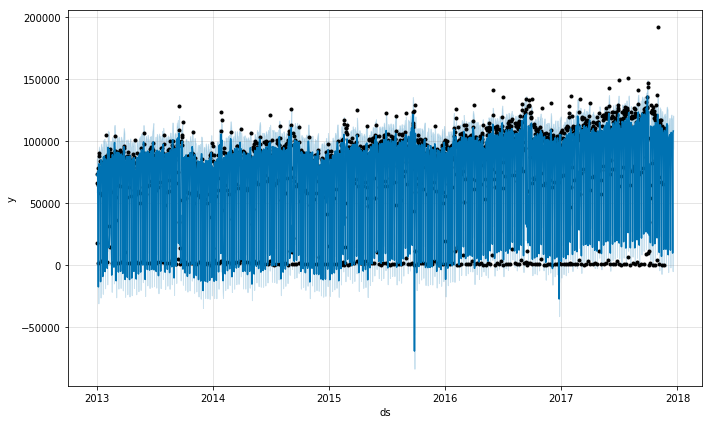

In [21]:
result_dict['y_sum']['model'].plot(result_dict['y_sum']['forecastProphetTable'])

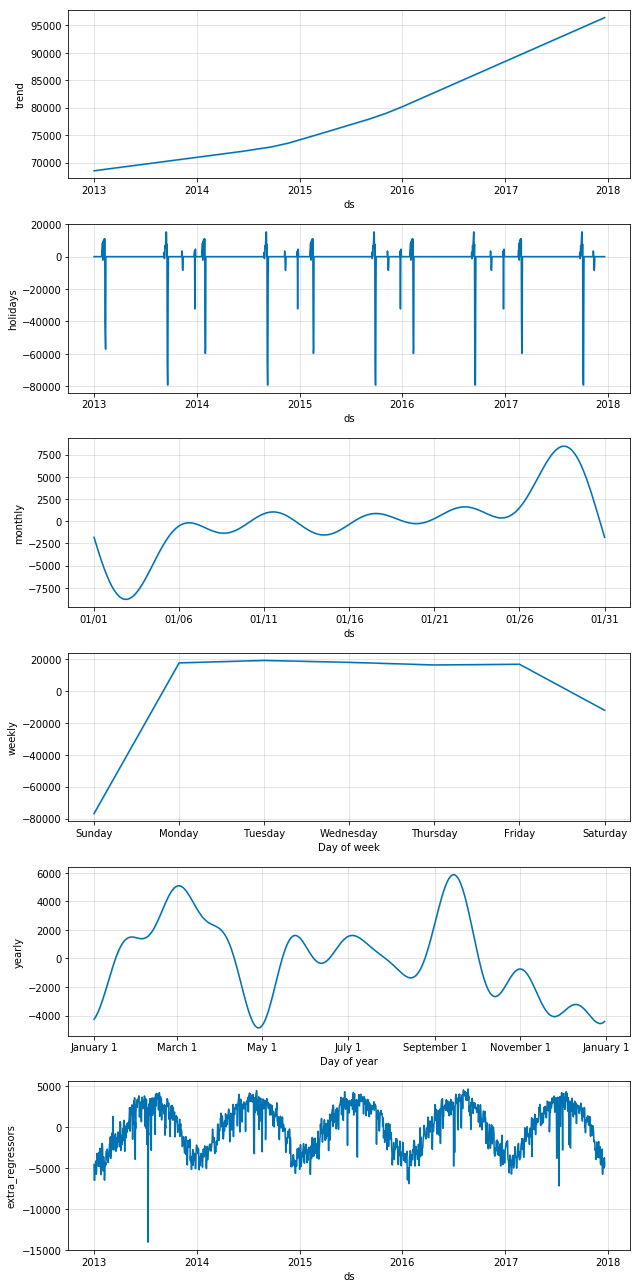

In [22]:
result_dict['y_sum']['model'].plot_components(result_dict['y_sum']['forecastProphetTable'])

In [60]:
result_dict['y_sum']['forecastProphetTable']

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,chocostick,chocostick_lower,chocostick_upper,christmas,...,thanksgivingbefore,thanksgivingbefore_lower,thanksgivingbefore_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
0,2013-01-01,68500.553881,68500.553881,68500.553881,58632.447979,85760.585850,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,19367.937753,19367.937753,19367.937753,-4264.702308,-4264.702308,-4264.702308,72281.583615
1,2013-01-02,68507.244647,68507.244647,68507.244647,59101.367978,85623.018311,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,18166.385062,18166.385062,18166.385062,-4113.702547,-4113.702547,-4113.702547,72944.234425
2,2013-01-03,68513.935413,68513.935413,68513.935413,60173.442279,86335.772423,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,16520.419931,16520.419931,16520.419931,-3931.991954,-3931.991954,-3931.991954,73954.901279
3,2013-01-04,68520.626178,68520.626178,68520.626178,62009.722395,89446.545091,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,16964.996878,16964.996878,16964.996878,-3721.055379,-3721.055379,-3721.055379,75792.958078
4,2013-01-05,68527.316944,68527.316944,68527.316944,33971.946779,60548.965604,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-11947.502047,-11947.502047,-11947.502047,-3482.986762,-3482.986762,-3482.986762,47318.187533
5,2013-01-06,68534.007709,68534.007709,68534.007709,-30789.141671,-4070.337108,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-76904.235963,-76904.235963,-76904.235963,-3220.445850,-3220.445850,-3220.445850,-17599.527991
6,2013-01-07,68540.698475,68540.698475,68540.698475,64058.427882,92213.245087,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,17831.998386,17831.998386,17831.998386,-2936.601013,-2936.601013,-2936.601013,78811.333426
7,2013-01-08,68547.389241,68547.389241,68547.389241,68322.252204,95503.300961,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,19367.937754,19367.937754,19367.937754,-2635.059503,-2635.059503,-2635.059503,81640.837026
8,2013-01-09,68554.080006,68554.080006,68554.080006,65802.502109,93781.340379,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,18166.385062,18166.385062,18166.385062,-2319.786788,-2319.786788,-2319.786788,79614.832939
9,2013-01-10,68560.770772,68560.770772,68560.770772,63651.301453,91693.744973,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,16520.419931,16520.419931,16520.419931,-1995.016888,-1995.016888,-1995.016888,77932.760126


In [61]:
weekly_seasonality= result_dict['y_sum']['forecastProphetTable']['yhat']

In [62]:
df_season= df_raw

In [63]:
df_season['y_sum']= df_raw['y_sum']- weekly_seasonality

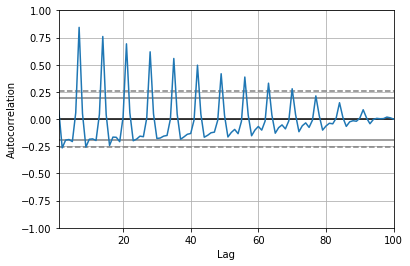

In [67]:
autocorrelation_plot(df_season['y_sum'][-100:])
plt.show()

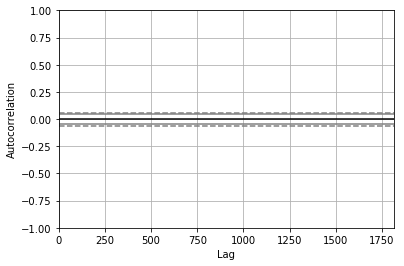

In [68]:
autocorrelation_plot(residuals)
plt.show()

In [52]:
residuals= []
for i in range(365):
    residuals.append(df_raw['y_sum'].shift(i).iloc[i:])
residuals= pd.DataFrame(residuals).transpose()
residuals.columns= [i for i in range(365)]
residuals.head(10)

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
0,-1968.937753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,47581.614938,-1968.937753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,56618.580069,47581.614938,-1968.937753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,61131.003122,56618.580069,47581.614938,-1968.937753,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,76727.502047,61131.003122,56618.580069,47581.614938,-1968.937753,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,78600.235963,76727.502047,61131.003122,56618.580069,47581.614938,-1968.937753,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,72443.001614,78600.235963,76727.502047,61131.003122,56618.580069,47581.614938,-1968.937753,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,68348.062246,72443.001614,78600.235963,76727.502047,61131.003122,56618.580069,47581.614938,-1968.937753,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,59322.614938,68348.062246,72443.001614,78600.235963,76727.502047,61131.003122,56618.580069,47581.614938,-1968.937753,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,61706.580069,59322.614938,68348.062246,72443.001614,78600.235963,76727.502047,61131.003122,56618.580069,47581.614938,-1968.937753,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
